In [123]:
## imports
import numpy as np
import pandas as pd
from matplotlib import *
import matplotlib.pyplot as plt

In [124]:
train=pd.read_csv("train_E6oV3lV.csv")

In [125]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [126]:
test=pd.read_csv("test_tweets_anuFYb8.csv")

In [127]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [128]:
class_0=train[train['label']==0]
class_1=train[train['label']==1]

In [129]:
class_0.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [130]:
class_1.head()

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...


In [131]:
#!pip install wordcloud

In [132]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

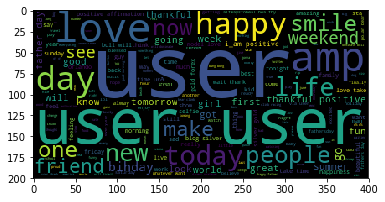

In [133]:
wc=WordCloud().generate(' '.join(class_0['tweet']))
plt.imshow(wc)

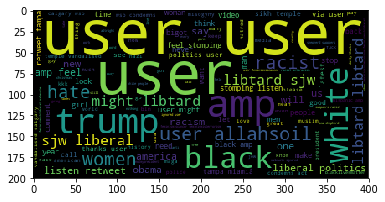

In [134]:
wc1=WordCloud().generate(' '.join(class_1['tweet']))
plt.imshow(wc1)

In [135]:
#cleaning the texts

In [136]:
nltk.corpus.stopwords.words('english')
stop_words=nltk.corpus.stopwords.words('english')
junk_words=["amp",'rt','https','will']
len(stop_words)
stop_words.extend(junk_words)
len(stop_words)

183

In [137]:
## cleaning the data
docs=train['tweet'].str.lower()
docs.head()
docs=docs.str.replace('[^a-z #@]','') # retain all alphabets with #@
docs.head()

0     @user when a father is dysfunctional and is s...
1    @user @user thanks for #lyft credit i cant use...
2                                  bihday your majesty
3    #model   i love u take with u all the time in ...
4                factsguide society now    #motivation
Name: tweet, dtype: object

In [138]:
#test
## cleaning the data
docs_t=test['tweet'].str.lower()
docs_t.head()
docs_t=docs_t.str.replace('[^a-z #@]','') # retain all alphabets with #@
docs_t.head()

0    #studiolife #aislife #requires #passion #dedic...
1     @user #white #supremacists want everyone to s...
2    safe ways to heal your #acne    #altwaystoheal...
3    is the hp and the cursed child book up for res...
4      rd #bihday to my amazing hilarious #nephew e...
Name: tweet, dtype: object

In [139]:
stemmer=nltk.PorterStemmer()
def clean_text(row_text):
    #print(type(row_text))
    row_words=row_text.split(' ')
    #print(row_words)
    row_words= [stemmer.stem(word) for word in row_words if word not in stop_words]
    #print(row_words)
    #print('----')
    return ' '.join(row_words)

docs_clean=docs.apply(lambda v: clean_text(v))

In [140]:
stemmer=nltk.PorterStemmer()
def clean_text(row_text):
    #print(type(row_text))
    row_words=row_text.split(' ')
    #print(row_words)
    row_words= [stemmer.stem(word) for word in row_words if word not in stop_words]
    #print(row_words)
    #print('----')
    return ' '.join(row_words)

docs_clean_t=docs_t.apply(lambda v: clean_text(v))

In [141]:
train["clean_one"]=docs_clean

In [142]:
test["clean_one"]=docs_clean_t

In [143]:
train.head()

,id,label,tweet,clean_one
0,1,0,@user when a father is dysfunctional and is s...,@user father dysfunct selfish drag kid dysfun...
1,2,0,@user @user thanks for #lyft credit i can't us...,@user @user thank #lyft credit cant use caus d...
2,3,0,bihday your majesty,bihday majesti
3,4,0,#model i love u take with u all the time in ...,#model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


In [144]:
test.head()

,id,tweet,clean_one
0,31963,#studiolife #aislife #requires #passion #dedic...,#studiolif #aislif #requir #passion #dedic #wi...
1,31964,@user #white #supremacists want everyone to s...,@user #white #supremacist want everyon see ne...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe way heal #acn #altwaystoh #healthi #...
3,31966,is the hp and the cursed child book up for res...,hp curs child book reserv alreadi ye #harry...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",rd #bihday amaz hilari #nephew eli ahmir unc...


In [145]:
df=train[["clean_one","label"]]

In [146]:
df.head()

,clean_one,label
0,@user father dysfunct selfish drag kid dysfun...,0
1,@user @user thank #lyft credit cant use caus d...,0
2,bihday majesti,0
3,#model love u take u time ur,0
4,factsguid societi #motiv,0


In [147]:
#train test spliting for validation

In [148]:
# or else go with df
from sklearn.model_selection import train_test_split

train1,validate= train_test_split(docs_clean,test_size=0.3, random_state=100)
train_y=train.loc[train1.index]["label"]
validate_y=train.loc[validate.index]["label"]

In [149]:
train1.shape, validate.shape,train_y.shape,validate_y.shape

((22373,), (9589,), (22373,), (9589,))

In [150]:
train1.head()

29940                           im hairdress new colour   
11026    grow #jw #jworg #bestlifeev #love   #smile #av...
15037    enjoy pizzamovi even famili fill tear watch in...
17123    roug #adoro #lip #redlip #rossettorosso   #soh...
25184     @user tomorrow final begin #sweetdream #weeke...
Name: tweet, dtype: object

In [152]:
df1=test['clean_one']

In [153]:
df1.head()

0    #studiolif #aislif #requir #passion #dedic #wi...
1     @user #white #supremacist want everyon see ne...
2    safe way heal #acn    #altwaystoh #healthi   #...
3    hp curs child book reserv alreadi ye    #harry...
4      rd #bihday amaz hilari #nephew eli ahmir unc...
Name: clean_one, dtype: object

In [154]:
from sklearn.feature_extraction.text import CountVectorizer

In [155]:
cv=CountVectorizer()
cv.fit(train1)
test_x_sparse=cv.transform(df1)
train_x_sparse=cv.transform(train1)
validate_x_sparse=cv.transform(validate)

In [156]:
train_x_sparse

<22373x26544 sparse matrix of type '<class 'numpy.int64'>'
	with 173633 stored elements in Compressed Sparse Row format>

In [157]:
validate_x_sparse

<9589x26544 sparse matrix of type '<class 'numpy.int64'>'
	with 66595 stored elements in Compressed Sparse Row format>

In [158]:
test_x_sparse

<17197x26544 sparse matrix of type '<class 'numpy.int64'>'
	with 119635 stored elements in Compressed Sparse Row format>

In [159]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dt_model=DecisionTreeClassifier(max_depth=20,random_state=100)
dt_model.fit(train_x_sparse,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, make_scorer
from tqdm import tqdm
SEED = 1
model_full_rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=SEED, n_jobs=-1)
model_full_rf.fit(train_x_sparse,train_y)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [178]:
model_full_rf.score(validate_x_sparse,validate_y)
#model_full_rf.score(train_x_sparse,train_y)

0.9532797997705704

In [160]:
pred_class=dt_model.predict(validate_x_sparse)

In [161]:
from sklearn.metrics import accuracy_score,f1_score,roc_curve,auc


In [162]:
print(accuracy_score(validate_y,pred_class))

0.9494212118051935


In [163]:
## lets clean the test data

In [164]:
validate_x_sparse

<9589x26544 sparse matrix of type '<class 'numpy.int64'>'
	with 66595 stored elements in Compressed Sparse Row format>

In [165]:
pred_test_class=dt_model.predict(test_x_sparse)

In [166]:
len(pred_test_class)

17197

In [167]:
submission=pd.DataFrame({'id':test['id'],'label':pred_test_class})
submission.to_csv("sub.csv",index=True)
submission.head()

,id,label
0,31963,0
1,31964,1
2,31965,0
3,31966,0
4,31967,0


In [ ]:
#lets train with whole data

In [168]:
X_train=train["clean_one"]

In [169]:
y_train=train["label"]

In [170]:
cv=CountVectorizer()
cv.fit(X_train)
test_x_s=cv.transform(df1)
train_x_s=cv.transform(X_train)


In [171]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dt_model=DecisionTreeClassifier(max_depth=20,random_state=100)
dt_model.fit(train_x_s,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [179]:
model_full_rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=SEED, n_jobs=-1)
model_full_rf.fit(train_x_s,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [180]:
pred_test_class1=model_full_rf.predict(test_x_s)

In [181]:
len(pred_test_class1)

17197

In [182]:
submission=pd.DataFrame({'id':test['id'],'label':pred_test_class})
submission.to_csv("submission1.csv",index=True)
submission.head()

,id,label
0,31963,0
1,31964,1
2,31965,0
3,31966,0
4,31967,0
